In [185]:
# necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn as sk

In [186]:
# read the data
data = pd.read_csv(r'C:\Users\User\Desktop\Customer decision\XY_Shop.csv')  
data.head()

,Adm,AdmDur,Inf,InfDur,Prd,PrdDur,BncRt,ExtRt,PgVal,SpclDay,Mo,OS,Bsr,Rgn,TfcTp,VstTp,Wkd,Rev
0,0,0.00,0,0.0,18,132.99,0.038211,0.054523,0.000000,0.0,4,3,1,1,2,0,1,NaN
1,1,0.00,0,0.0,37,1150.20,0.001245,0.030321,0.000000,0.0,11,2,2,4,2,0,1,NaN
2,6,191.98,0,0.0,38,1266.78,0.004742,0.019551,17.816864,0.0,10,2,3,1,3,0,0,NaN
3,3,263.68,0,0.0,24,749.14,0.004474,0.024079,14.578547,0.0,7,2,2,2,1,0,1,NaN
4,0,0.00,0,0.0,3,136.41,0.000000,0.066300,0.000000,0.0,12,1,1,3,3,1,0,NaN


In [187]:
data.shape

(500000, 18)

In [188]:
data.iloc[49997:50008]

,Adm,AdmDur,Inf,InfDur,Prd,PrdDur,BncRt,ExtRt,PgVal,SpclDay,Mo,OS,Bsr,Rgn,TfcTp,VstTp,Wkd,Rev
49997,1,0.00,0,0.0,3,58.55,0.000000,0.048343,96.737655,0.0,9,2,2,5,2,0,1,NaN
49998,4,357.05,0,0.0,27,1278.00,0.000000,0.006812,14.538181,0.0,11,2,2,5,2,0,0,NaN
49999,0,0.00,0,0.0,26,1646.42,0.007550,0.032493,0.000000,0.0,2,2,2,4,3,0,1,NaN
50000,0,0.00,0,0.0,1,0.00,0.157489,0.115168,0.000000,0.0,12,2,2,1,9,0,0,0.0
50001,7,116.19,0,0.0,79,2683.58,0.000000,0.001910,0.000000,0.0,4,2,3,2,2,1,0,0.0
50002,6,233.07,0,0.0,8,171.08,0.033427,0.062316,0.000000,0.0,12,2,2,2,1,0,0,0.0
50003,0,0.00,0,0.0,5,0.00,0.140943,0.160706,0.000000,0.0,6,2,2,3,5,0,0,0.0
50004,0,0.00,0,0.0,6,112.57,0.035324,0.021440,0.000000,0.0,10,2,2,4,7,1,1,0.0
50005,0,0.00,0,0.0,8,190.03,0.044795,0.053777,0.000000,0.0,12,1,1,4,3,0,0,0.0
50006,2,157.16,0,0.0,12,745.57,0.000000,0.014063,31.795928,0.0,6,2,2,1,2,0,0,1.0


In [220]:
# deviding the datafirst 50k rows for testing and the rest for training
test_data = data.iloc[0:50000]
train_data = data.iloc[50000:]

In [190]:
train_data['Rev'].value_counts()  # count the number of each value in the column   

Rev
0.0    349140
1.0    100860
Name: count, dtype: int64

In [191]:
# take a balance between label`s unique values of the data
# remove extra 248280 rows of the data with the value of Rev == 0
train_data.drop(train_data[train_data['Rev'] == 0][0:248280].index, inplace = True)
train_data['Rev'].value_counts()

C:\Users\User\AppData\Local\Temp\ipykernel_10044\1193380231.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(train_data[train_data['Rev'] == 0][0:248280].index, inplace = True)


Rev
1.0    100860
0.0    100860
Name: count, dtype: int64

In [192]:
# check the data types of the columns   
train_data.dtypes   
train_data.head(10)

,Adm,AdmDur,Inf,InfDur,Prd,PrdDur,BncRt,ExtRt,PgVal,SpclDay,Mo,OS,Bsr,Rgn,TfcTp,VstTp,Wkd,Rev
50006,2,157.16,0,0.00,12,745.57,0.000000,0.014063,31.795928,0.0,6,2,2,1,2,0,0,1.0
50009,2,7.00,0,0.00,10,74.95,0.041499,0.103621,0.000000,0.0,3,2,2,1,1,0,1,1.0
50018,0,0.00,0,0.00,4,25.99,0.000000,0.042379,0.000000,0.0,4,3,1,1,1,0,1,1.0
50019,6,98.03,1,28.35,5,343.67,0.000000,0.010669,0.000000,0.0,4,2,2,2,6,1,1,1.0
50023,1,0.00,4,150.25,186,4982.11,0.008166,0.020646,0.000000,0.0,11,1,2,2,2,0,0,1.0
50026,2,73.24,0,0.00,37,805.71,0.004772,0.034228,0.000000,0.0,11,1,1,2,1,0,1,1.0
50028,0,0.00,0,0.00,21,343.53,0.006840,0.006957,13.208708,0.0,9,1,1,2,2,0,0,1.0
50039,2,160.68,0,0.00,81,3153.63,0.004574,0.019026,0.000000,0.0,7,2,4,5,1,0,0,1.0
50051,1,18.99,0,0.00,17,335.72,0.000000,0.026478,0.000000,0.0,10,2,2,1,1,0,1,1.0
50063,0,0.00,0,0.00,34,1380.48,0.018443,0.036442,14.565922,0.0,5,1,5,3,11,0,1,1.0


In [193]:
# shuffle the data where the data is sorted by the column 'Rev'
train_data = train_data.sample(frac=1).reset_index(drop=True)
train_data.head(10)

,Adm,AdmDur,Inf,InfDur,Prd,PrdDur,BncRt,ExtRt,PgVal,SpclDay,Mo,OS,Bsr,Rgn,TfcTp,VstTp,Wkd,Rev
0,4,127.08,2,4.99,68,1853.99,0.004991,0.018823,0.000000,0.0,8,2,2,5,8,0,1,1.0
1,2,22.14,0,0.00,26,2879.72,0.007494,0.029199,7.824802,0.0,10,2,2,4,2,0,0,1.0
2,4,55.60,0,0.00,30,269.78,0.000000,0.002320,0.000000,0.0,2,2,2,1,3,0,0,0.0
3,7,770.96,0,0.00,135,5154.83,0.000728,0.024836,6.803519,0.0,11,2,2,1,3,0,0,1.0
4,4,134.32,0,0.00,2,46.79,0.000000,0.034921,0.000000,0.0,8,1,1,4,2,0,0,1.0
5,0,0.00,0,0.00,2,165.67,0.000000,0.045481,0.000000,0.0,11,4,7,5,13,2,0,0.0
6,7,229.06,2,32.91,74,2612.55,0.000765,0.005482,0.000000,0.0,5,2,3,1,5,0,0,0.0
7,5,202.11,0,0.00,121,3614.12,0.010670,0.022786,2.166190,0.0,9,2,2,1,3,0,0,1.0
8,3,235.26,0,0.00,8,1033.73,0.039211,0.036951,0.000000,0.0,6,1,1,4,4,1,1,0.0
9,4,358.61,0,0.00,27,1261.40,0.000000,0.006749,14.159076,0.0,12,2,2,5,2,0,0,1.0


In [194]:
# check the nun values in the data  
train_data.isnull().sum()

Adm        0
AdmDur     0
Inf        0
InfDur     0
Prd        0
PrdDur     0
BncRt      0
ExtRt      0
PgVal      0
SpclDay    0
Mo         0
OS         0
Bsr        0
Rgn        0
TfcTp      0
VstTp      0
Wkd        0
Rev        0
dtype: int64

In [195]:
#check the unique values in the data
train_data.nunique()

Adm            27
AdmDur      36203
Inf            23
InfDur      21998
Prd           484
PrdDur     126508
BncRt       47648
ExtRt       73015
PgVal       67680
SpclDay        10
Mo             12
OS              5
Bsr             8
Rgn             6
TfcTp          13
VstTp           3
Wkd             2
Rev             2
dtype: int64

In [196]:
# check the correlation between Rev the columns
train_data.corr()['Rev'].sort_values(ascending=False)

Rev        1.000000
PgVal      0.327520
Wkd        0.229005
Prd        0.124602
PrdDur     0.122234
Adm        0.114918
Mo         0.104750
VstTp      0.083305
Inf        0.080658
AdmDur     0.079514
InfDur     0.059680
Bsr        0.020399
OS         0.014641
TfcTp     -0.004114
Rgn       -0.008448
SpclDay   -0.071608
BncRt     -0.142246
ExtRt     -0.190445
Name: Rev, dtype: float64

In [197]:
#split the data into X
X = train_data.drop('Rev', axis=1)
y = train_data['Rev']

In [198]:
# function to standardize the data
def standardize(data):
    for column in data.columns:
        if data[column].dtype == 'float64':
            data[column] = (data[column] - data[column].mean()) / data[column].std()
    return data

standardize(X)
train_data.head(5)

,Adm,AdmDur,Inf,InfDur,Prd,PrdDur,BncRt,ExtRt,PgVal,SpclDay,Mo,OS,Bsr,Rgn,TfcTp,VstTp,Wkd,Rev
0,4,127.08,2,4.99,68,1853.99,0.004991,0.018823,0.000000,0.0,8,2,2,5,8,0,1,1.0
1,2,22.14,0,0.00,26,2879.72,0.007494,0.029199,7.824802,0.0,10,2,2,4,2,0,0,1.0
2,4,55.60,0,0.00,30,269.78,0.000000,0.002320,0.000000,0.0,2,2,2,1,3,0,0,0.0
3,7,770.96,0,0.00,135,5154.83,0.000728,0.024836,6.803519,0.0,11,2,2,1,3,0,0,1.0
4,4,134.32,0,0.00,2,46.79,0.000000,0.034921,0.000000,0.0,8,1,1,4,2,0,0,1.0


In [199]:
train_data.corr()['Rev'].sort_values(ascending=False)

Rev        1.000000
PgVal      0.327520
Wkd        0.229005
Prd        0.124602
PrdDur     0.122234
Adm        0.114918
Mo         0.104750
VstTp      0.083305
Inf        0.080658
AdmDur     0.079514
InfDur     0.059680
Bsr        0.020399
OS         0.014641
TfcTp     -0.004114
Rgn       -0.008448
SpclDay   -0.071608
BncRt     -0.142246
ExtRt     -0.190445
Name: Rev, dtype: float64

In [201]:
# function to delete the columns with the correlation near 0.0
def delete_columns(data):
    for column in data.columns:
        if data[column].dtype == 'float64' or data[column].dtype == 'int64':
            if data[column].corr(data['Rev']) < 0.1:
                data.drop(column, axis=1, inplace=True)
    return data

delete_columns(train_data)

,Adm,Prd,PrdDur,PgVal,Mo,Wkd,Rev
0,4,68,1853.99,0.000000,8,1,1.0
1,2,26,2879.72,7.824802,10,0,1.0
2,4,30,269.78,0.000000,2,0,0.0
3,7,135,5154.83,6.803519,11,0,1.0
4,4,2,46.79,0.000000,8,0,1.0
...,...,...,...,...,...,...,...
201715,1,48,1004.47,4.791940,11,1,1.0
201716,1,13,271.17,72.161109,11,0,1.0
201717,2,26,2881.97,7.762901,11,0,1.0
201718,1,102,5003.14,0.000000,12,0,0.0


In [202]:
# split the data into X.train, y.train, X.test, y.test with sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [203]:
train_data.corr()['Rev'].sort_values(ascending=False)

Rev       1.000000
PgVal     0.327520
Wkd       0.229005
Prd       0.124602
PrdDur    0.122234
Adm       0.114918
Mo        0.104750
Name: Rev, dtype: float64

In [204]:
# import knn model from sklearn and f1_score and cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score


In [205]:
# function to find the best k value for knn model
def best_k_value(X_train, y_train):
    k_values = list(range(2, 10))
    best_score = 0
    best_k = 0
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='f1')
        score = scores.mean()
        if score > best_score:
            best_score = score
            best_k = k
    return best_k

print(best_k_value(X_train, y_train))

3


In [207]:
# train the knn model with the best k value
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# predict the test data
y_pred = knn.predict(X_test)

# convert continuous target values into discrete classes for y_test
y_test_discrete = pd.cut(y_test, bins=2, labels=[0, 1])

# calculate the f1 score
f1_score(y_test_discrete, y_pred)

0.8568888888888889

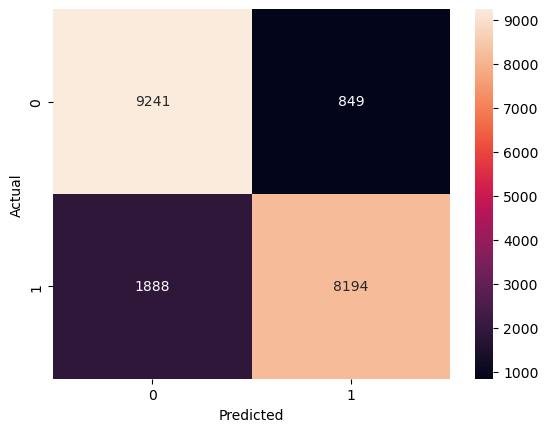

In [ ]:
# import the confusion matrix from sklearn
from sklearn.metrics import confusion_matrix

# visualize the confusion matrix
sns.heatmap(confusion_matrix(y_test_discrete, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Predict real test data

In [221]:
# using functions to preprocess the test_data
standardize(test_data)
delete_columns(test_data)

C:\Users\User\AppData\Local\Temp\ipykernel_10044\2610941151.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = (data[column] - data[column].mean()) / data[column].std()


,Adm,AdmDur,Inf,InfDur,Prd,PrdDur,BncRt,ExtRt,PgVal,SpclDay,Mo,OS,Bsr,Rgn,TfcTp,VstTp,Wkd,Rev
0,0,-0.490984,0,-0.257854,18,-0.593039,0.531315,0.477253,-0.331723,-0.311944,4,3,1,1,2,0,1,NaN
1,1,-0.490984,0,-0.257854,37,-0.004612,-0.453911,-0.170590,-0.331723,-0.311944,11,2,2,4,2,0,1,NaN
2,6,0.747202,0,-0.257854,38,0.062826,-0.360708,-0.458883,0.758584,-0.311944,10,2,3,1,3,0,0,NaN
3,3,1.209636,0,-0.257854,24,-0.236614,-0.367851,-0.337677,0.560415,-0.311944,7,2,2,2,1,0,1,NaN
4,0,-0.490984,0,-0.257854,3,-0.591060,-0.487093,0.792501,-0.331723,-0.311944,12,1,1,3,3,1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,4,0.399378,1,0.527808,65,0.849048,-0.435174,-0.522136,0.300491,-0.311944,10,1,2,1,7,0,1,NaN
49996,0,-0.490984,0,-0.257854,4,-0.597973,0.715029,0.538953,-0.331723,2.810489,4,2,2,4,3,0,0,NaN
49997,1,-0.490984,0,-0.257854,3,-0.636100,-0.487093,0.311826,5.588163,-0.311944,9,2,2,5,2,0,1,NaN
49998,4,1.811831,0,-0.257854,27,0.069316,-0.487093,-0.799882,0.557944,-0.311944,11,2,2,5,2,0,0,NaN


In [222]:
# drop Rev column from the test data
test_data.drop('Rev', axis=1, inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_10044\2398326037.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.drop('Rev', axis=1, inplace=True)


In [227]:
# predict the test data
final_pred = knn.predict(test_data)

In [239]:
# save the final prediction to a csv file using id and Rev columns
final_pred = pd.DataFrame(final_pred, columns=['Rev'])
final_pred['id'] = final_pred.set_index('Rev').index
final_pred = final_pred[['id', 'Rev']]
# make values in int type
final_pred['Rev'] = final_pred['Rev'].astype(int)
final_pred['id'] = final_pred['id'].astype(int)

In [244]:
# save the final prediction to a csv file
final_pred.to_csv('submission.csv', index=False)